In [35]:
import pandas as pd

#read file and visualise it
data = pd.read_csv('dataset.csv', nrows=300000)

In [36]:
print(data)

        app_id                    app_name  \
0           10              Counter-Strike   
1           10              Counter-Strike   
2           10              Counter-Strike   
3           10              Counter-Strike   
4           10              Counter-Strike   
...        ...                         ...   
299995   12200  Bully: Scholarship Edition   
299996   12200  Bully: Scholarship Edition   
299997   12200  Bully: Scholarship Edition   
299998   12200  Bully: Scholarship Edition   
299999   12200  Bully: Scholarship Edition   

                                              review_text  review_score  \
0                                         Ruined my life.             1   
1       This will be more of a ''my experience with th...             1   
2                           This game saved my virginity.             1   
3       • Do you like original games? • Do you like ga...             1   
4                Easy to learn, hard to master.                       1 

In [37]:
#Clean the data:
import re
#Remove duplicates, null values, and irrelevant information.
#Handle noisy data (e.g., special characters, HTML tags).
data.drop_duplicates()
#print(data['review_text'])

for review in data['review_text']:
    review = re.sub('[^A-Za-z0-9]+',' ', str(review) ).lower()



In [38]:
data['review_text'].dropna(inplace=True)

#Text preprocessing:
import nltk
from nltk.tokenize import word_tokenize
#nltk.download('punkt')
#Tokenization, lowercasing, removing stopwords, stemming, and lemmatization.
text = data['review_text'].str.lower().astype('str')

text = text.apply(word_tokenize)
text.head()

0                                [ruined, my, life, .]
1    [this, will, be, more, of, a, ``, my, experien...
2                [this, game, saved, my, virginity, .]
3    [•, do, you, like, original, games, ?, •, do, ...
4            [easy, to, learn, ,, hard, to, master, .]
Name: review_text, dtype: object

In [39]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
filtered_sentences = []
for texts in text:
    filtered_sentence = []
    for word in texts:
        if word not in stop_words:
            filtered_sentence.append(word.replace('$',''))
    filtered_sentences.append(filtered_sentence)


In [40]:
#stem words
import string
#print(filtered_sentences[0])
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stemmed_sentences = []

for stentences in filtered_sentences:
    stemmed_sentence = " "
    for word in stentences:
        stemmed_sentence += " " + stemmer.stem(word)
        stemmed_sentence = stemmed_sentence.translate(str.maketrans('', '', string.punctuation))
    stemmed_sentences.append(stemmed_sentence)

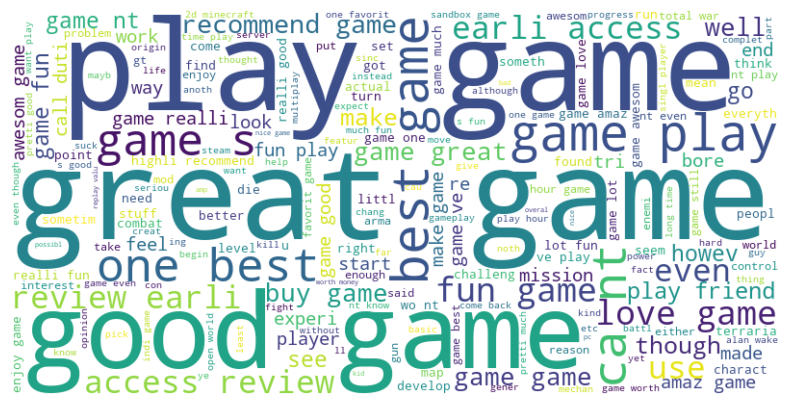

In [41]:
#print(stemmed_sentences[0])
#We already have the labels -1 = negative 1 = positive

#Now to do exploratory data analysis 
data["processed_reviews"] = stemmed_sentences

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate("+".join(data['processed_reviews'].astype('str')))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

In [42]:
dfe = data['processed_reviews'].explode().to_frame().reset_index(drop=True)
counts = []
for review in dfe['processed_reviews']:
    string = review.split()
    for word in string:
        counts.append(word)
print(len(counts))


7501520


In [43]:
import seaborn as sns
from collections import Counter
counts = Counter(counts)
counts.most_common(10)
#honestly not as good as the word cloud IMO

[('game', 425180),
 ('play', 129806),
 ('s', 100176),
 ('like', 77039),
 ('get', 74192),
 ('nt', 72606),
 ('fun', 68832),
 ('good', 58541),
 ('great', 55499),
 ('one', 54156)]

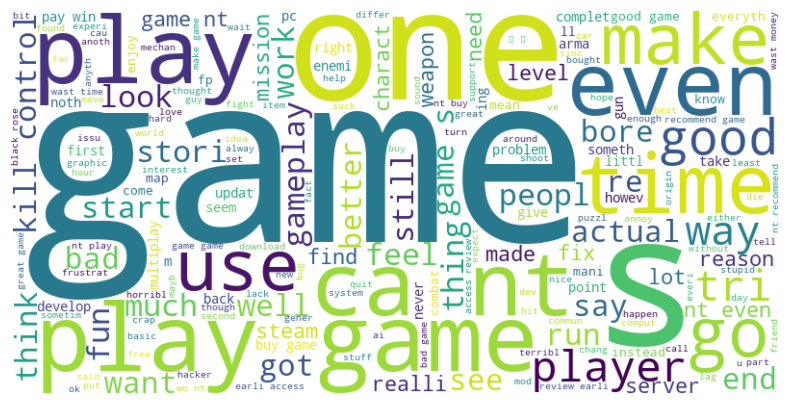

In [44]:
#all negative review word cloud
negative_data = data[data['review_score'] == -1]
# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate("+".join(negative_data['processed_reviews'].astype('str')))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

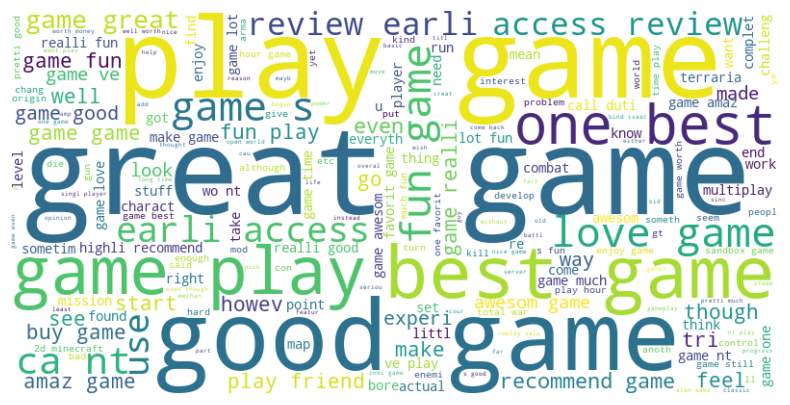

In [45]:
positive_data = data[data['review_score'] == 1]
# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate("+".join(positive_data['processed_reviews'].astype('str')))

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()

In [46]:
new_processed_review = data['processed_reviews'].str.split()
data['processed_reviews'] = new_processed_review

print(data['processed_reviews'][0])

['ruin', 'life']


In [49]:
import gensim

from gensim.models import Word2Vec, KeyedVectors

model = gensim.models.Word2Vec(
        data['processed_reviews'],
        window=10,
        min_count=2,
        workers=10)

In [51]:
wl = 'game'

model.wv.most_similar(wl)

[('howev', 0.5962539911270142),
 ('terraria', 0.5755912661552429),
 ('although', 0.5650089979171753),
 ('stampscostumesbadgeslevel', 0.5565427541732788),
 ('persist', 0.5367739796638489),
 ('realli', 0.5303391218185425),
 ('unfortun', 0.5302349328994751),
 ('experi', 0.5286213755607605),
 ('play', 0.5163516998291016),
 ('still', 0.5158150792121887)]